In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import open3d as o3d
from open3d.visualization import draw
from PIL import Image

%matplotlib inline

camera matrix: [[1.55395721e+03 0.00000000e+00 6.43824380e+02]
 [0.00000000e+00 1.61747575e+03 3.33557145e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
disortion coefficient: [[ 2.35458948e-02  1.16271901e+01 -7.28039900e-05  1.14780209e-03
  -1.89283039e+02]]
rotation vectors: [array([[ 0.15366733],
       [-0.04987265],
       [ 0.01291736]])]
transformation vector [array([[-1.90079185],
       [-1.60773439],
       [30.50445539]])]


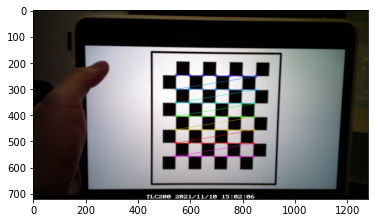

In [3]:
img = cv2.imread('frame0.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# # prepare object points,
objp = np.zeros((7*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:7].T.reshape(-1,2)


# Arrays to store object points and image points from all the images.
objpoints = [] 
imgpoints = [] 

ret, corners = cv2.findChessboardCorners(gray, (7,7), None)
ret

if ret == True:
    objpoints.append(objp)

    # cv2.cornerSubPix() increases the accuracy of the corner coordinates
    corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
    imgpoints.append(corners2)

img = cv2.drawChessboardCorners(img, (7,7), corners2,ret)
plt.imshow(img)

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, 
                                                   imgpoints, gray.shape[::-1],None,None)

print('camera matrix:', mtx)
print('disortion coefficient:',dist)
print('rotation vectors:',rvecs)
print('transformation vector', tvecs)




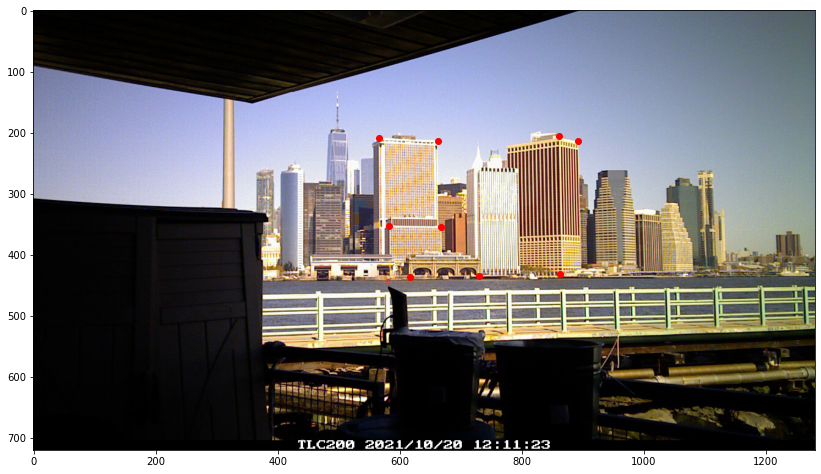

In [4]:
battery = cv2.imread('Vis2021-10-20T12_11_22.jpg')
battery =  cv2.cvtColor(battery, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(14,15))
plt.imshow(battery)


vis_pts = np.array([
    (566,209), 
    (663,214),
    (583,353),
    (668,355),
    (616,436),
    (730,435),
    (861, 205),
    (892, 213),
    (863, 432),

], dtype=np.float32)


# plt.plot(892, 213, marker='.', color="red")

for i in vis_pts:
    plt.plot(i[0],i[1], marker='o', color="red") #NYP1
    

In [5]:
world = np.array([
    (980789.1, 195006.7, 644),
    (981061.2, 195066.0, 644),
    (980827.3, 194931.9, 239),
    (981058.9, 194983.6, 239),
    (980880.0, 194552.6, 6),
    (981178.9, 194643.3, 6),
#     (980610.8, 195222.6, 314),
#     (981241.0, 195088.5, 522),
    (981698.8, 195245.1, 690),
    (981814.2, 195347.4, 690),
     (981698.8, 195245.1, 8),
])


In [6]:
success, rvecs, tvecs = cv2.solvePnP(world, 
                                     vis_pts, 
                                     mtx, 
                                     dist, 
            flags=cv2.SOLVEPNP_EPNP)

print('rvecs:',rvecs)
print('tvecs:', tvecs)

rvecs: [[ 1.48939244]
 [-0.08644972]
 [ 0.06825564]]
tvecs: [[-956797.73724219]
 [  -7818.57205957]
 [-286857.70799   ]]


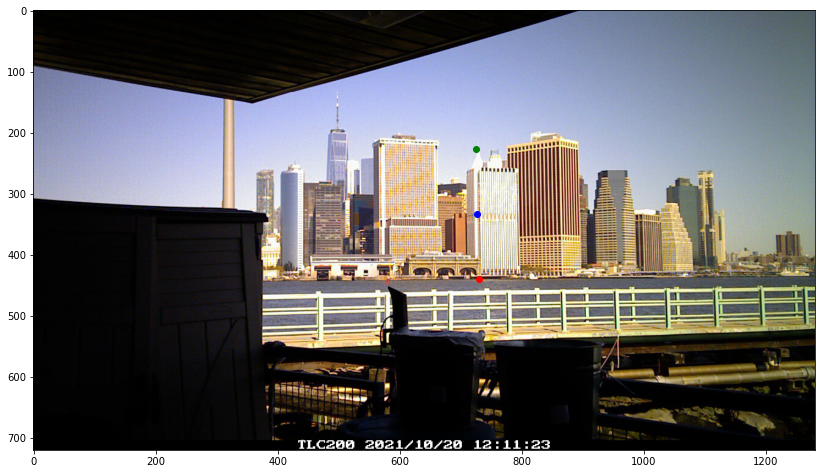

In [7]:
plt.figure(figsize=(14,15))
nyp4 = np.array([(981251.024592733, 195066.973346419, 0),
                (981251.024592733, 195066.973346419, 300),
                (981251.024592733, 195066.973346419, 600)
                ]) 
nyp4_2d, jacobian = cv2.projectPoints(nyp4, 
                                      rvecs, 
                                      tvecs,
                                      mtx, 
                                      dist)



# # plt.figure(figsize=(14,15))
# im = battery
plt.imshow(battery)
plt.plot( int(nyp4_2d[0][0][0]),int(nyp4_2d[0][0][1]), marker='o', color="red")
plt.plot( int(nyp4_2d[1][0][0]),int(nyp4_2d[1][0][1]), marker='o', color="blue")
plt.plot( int(nyp4_2d[2][0][0]),int(nyp4_2d[2][0][1]), marker='o', color="green")

## Load Point Cloud

In [8]:
xyz = np.genfromtxt('gi_view_pointcloud.csv', delimiter=',')[1:]

In [9]:
pointx = []
valx = []
for i in range((xyz.shape[0])):
    pcx,_ = cv2.projectPoints(xyz[i],rvecs,tvecs,mtx,dist)
    try: 
        val = battery[int(pcx[0][0][1]), int(pcx[0][0][0])]
        pointx.append([xyz[i][0],xyz[i][1],xyz[i][2]])
        valx.append(val)
    except:
        pass
    

In [ ]:
rgb = np.float32(valx) / 255.0
rgb.shape

In [10]:
np.savetxt("xyz_color.csv", np.asarray(pointx), delimiter=",")
np.savetxt("rgb_color.csv",np.asarray(valx) , delimiter=",")